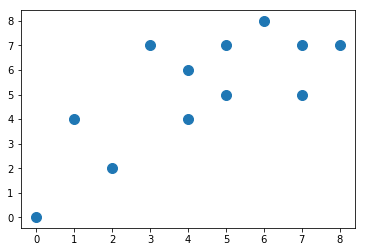

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
X = np.array([[7,5],[5,7],[7,7],[4,4],[4,6],[1,4],
             [0,0],[2,2],[8,7],[6,8],[5,5],[3,7]])

plt.scatter(X[:,0],X[:,1], s= 100)
plt.show()

In [7]:
from sklearn.cluster import KMeans

# init : 초기화 방법 'k-means++, random, ndarray배열로 초기값을 지정 '
model = KMeans(n_clusters=2, init= "random", n_init=1, max_iter=1, random_state=1).fit(X)

c0, c1 = model.cluster_centers_
print(c0, c1)
print(model.labels_)
print(model.inertia_) # 중심으로 부터의 거리의 제곱합 

[6.6 6.8] [2.71428571 4.        ]
[0 0 0 1 1 1 1 1 0 0 0 1]
63.004081632653055


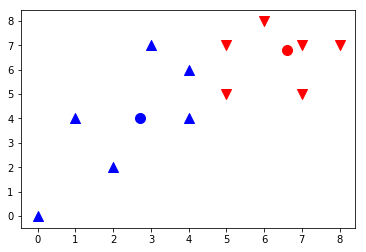

In [8]:
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100,
           marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100,
           marker='^', c='b')


plt.scatter(c0[0],c0[1],s=100, c="r")
plt.scatter(c1[0],c1[1],s=100, c="b")

plt.show()

In [9]:
# 새로운 축의 생성과 거리값
import numpy as np
a = np.array([1., 2., 3., 4.])

a
a.shape
a_4_1 = a[:, np.newaxis]
a_4_1
a= np.array([1,1])
b= np.array([2,2])
np.linalg.norm(a -b)

1.4142135623730951

In [10]:
def kmeans_df(c0, c1):
    df = pd.DataFrame(np.hstack([X,
                                np.linalg.norm(X -c0, axis= 1)[:, np.newaxis],
                                np.linalg.norm(X -c1, axis= 1)[:, np.newaxis],
                                model.labels_[:,np.newaxis]]),
                     columns = ["x0", "x1","d0","d1","c"])
    
    return df

kmeans_df(c0,c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,1.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [11]:
# 새로운 축의 생성과 거리값
import numpy as np
a = np.array([1., 2., 3., 4.])

a
a.shape
a_4_1 = a[:, np.newaxis] # np.newaxis : 차원을 한 개 증가시켜라 
a_4_1
a= np.array([1,1])
b= np.array([2,2])
np.linalg.norm(a -b) # 벡터의 크기를 계산하는 함수

# 내적 a 내적 b 
# || || => np.linalg.norm = > 크기 대각선의 길이값, 피타고라스 정리로 구해진 길이 


# horizontal stack : 열로 쌓아라 
# 중심으로부터의 거리
# broadcasting 되어서 각 좌표로 부터
def kmeans_df(c0, c1):
    df = pd.DataFrame(np.hstack([X, # 데이터 좌표 값 
                                np.linalg.norm(X -c0, axis= 1)[:, np.newaxis],
                                np.linalg.norm(X -c1, axis= 1)[:, np.newaxis],
                                model.labels_[:,np.newaxis]]),
                     columns = ["x0", "x1","d0","d1","c"])
    
    return df

kmeans_df(c0,c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,1.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:,1], c= labels, s=40, cmap='viridis', zorder=2)
    
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i], [center]).max()
            for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc = '#CCCCCC', lw=3, alpha=0.5,
                               zorder=1))

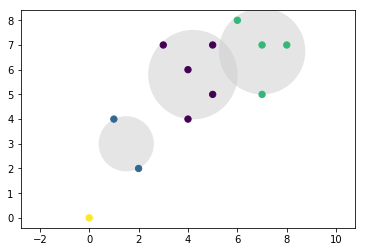

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    # zorder=2 는 그래픽 출력 순서 
    ax.scatter(X[:, 0], X[:,1], c= labels, s=40, cmap='viridis', zorder=2)
    
    centers = kmeans.cluster_centers_ # 중심값을 출력 
    radii = [cdist(X[labels==i], [center]).max() # 큰 수를 하나 찾음 
            for i, center in enumerate(centers)]
    for x, y in centers:
        plt.scatter(x, y, s=100, c="r")
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc = '#CCCCCC', lw=3, alpha=0.5,
                               zorder=1))

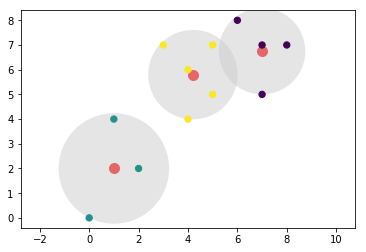

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X)

In [21]:
# K-means를 이용한 원형 이상치 제거
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, label = make_blobs(100, centers = 1)
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    # zorder=2 는 그래픽 출력 순서 
    ax.scatter(X[:, 0], X[:,1], c= labels, s=40, cmap='viridis', zorder=2)
    
    centers = kmeans.cluster_centers_ # 중심값을 출력 
    radii = [cdist(X[labels==i], [center]).max() # 큰 수를 하나 찾음 
            for i, center in enumerate(centers)]
    for x, y in centers:
        plt.scatter(x, y, s=100, c="r")
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc = '#CCCCCC', lw=3, alpha=0.5,
                               zorder=1))

In [37]:
distance = kmeans.transform(X) #r거리값을 리턴
#1차원으로 변환 for 정렬
#sort하고나서 인덱스를 가지고 옴
#::이 붙으면 배수로 증가하면 -1이니 한칸씩 뒤에서 가지고와라. 그 중이 5개(:5)를 뽑아라. 
# 결과적으로 정렬된 가장 거리가 먼 데이터 5개가 출력된다. 
sorted_idx = np.argsort(distance.ravel())[::-1][:5]

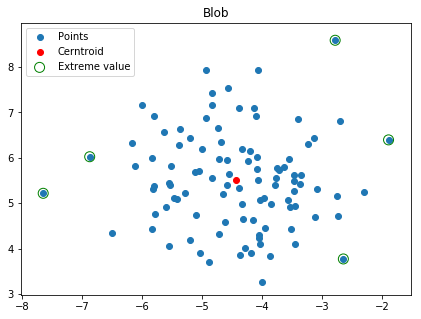

In [38]:
f , ax = plt.subplots(figsize=(7,5))
ax.set_title('Blob')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
          kmeans.cluster_centers_[:,1], label='Cerntroid',
          color='r')
ax.scatter(X[sorted_idx][:,0],
          X[sorted_idx][:,1],
          label = 'Extreme value', edgecolors='g',
          facecolors='none', s=100)
ax.legend(loc='best')

In [31]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64
china = load_sample_image("china.jpg")
china = np.array(china, dtype = np.float64) / 255

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [56]:
w, h, d = original_shape = tuple(china.shape)
w, h, d

(427, 640, 3)

In [39]:
image_array = np.reshape(china, (w*h, d))

In [43]:
image_array_sample = shuffle(image_array, random_state = 100)[:1000]
kmeans = KMeans(n_clusters = n_colors, random_state=0).fit(image_array_sample)

In [44]:
labels = kmeans.predict(image_array)

# codebook 물감 pallete

def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w,h,d))
    label_idx =0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx +=1
    return image

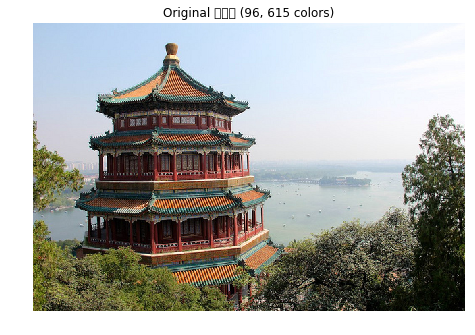

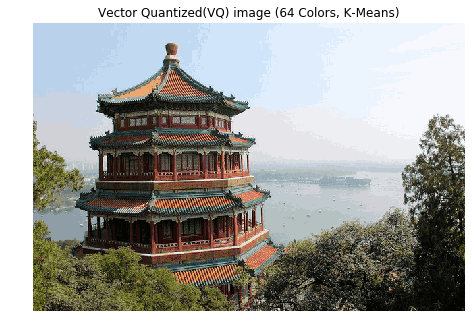

In [45]:
plt.figure(1)
plt.clf()
ax =plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지 (96, 615 colors)')
plt.imshow(china)
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Vector Quantized(VQ) image (64 Colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [60]:
from sklearn import cluster

n_colors = 64
makoto = plt.imread('makoto.jpg')    

makoto = np.array(makoto, dtype = np.float64) / 255
w, h, d = original_shape = tuple(makoto.shape)
image2d = image.reshape(w*h, d)
print(original_shape)

NameError: name 'image' is not defined

In [52]:
image_array = np.reshape(makoto, (w*h, d))

image_array_sample = shuffle(image_array, random_state = 100)[:1000]
kmeans = KMeans(n_clusters = n_colors, random_state=0).fit(image_array_sample)

In [54]:
labels = kmeans.predict(image_array)

# codebook 물감 pallete

def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w,h,d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx +=1
    return image

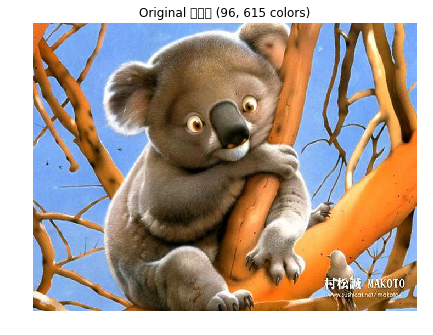

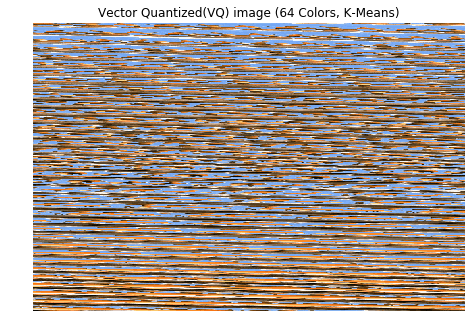

In [57]:
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original 이미지 (96, 615 colors)')
plt.imshow(makoto)
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Vector Quantized(VQ) image (64 Colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [61]:
from sklearn.cluster import DBSCAN
X, y= make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n{}".format(clusters))

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import mglearn
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

클러스터 레이블:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Text(0,0.5,'특성 1 ')

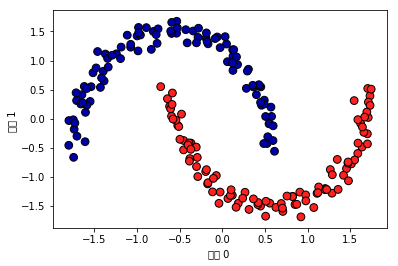

In [62]:
from sklearn.preprocessing import StandardScaler # 정규분포 ,  z 점수 -1 ~ 1
from sklearn.datasets import make_moons
import mglearn
X, y = make_moons(n_samples =200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
           cmap = mglearn.cm2, s=60, edgecolors='black')

plt.xlabel("특성 0 ")
plt.ylabel("특성 1 ")